In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].dropna()
df.head()


,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [3]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 0.6293706293706294


In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Random Forest Accuracy: 0.6363636363636364


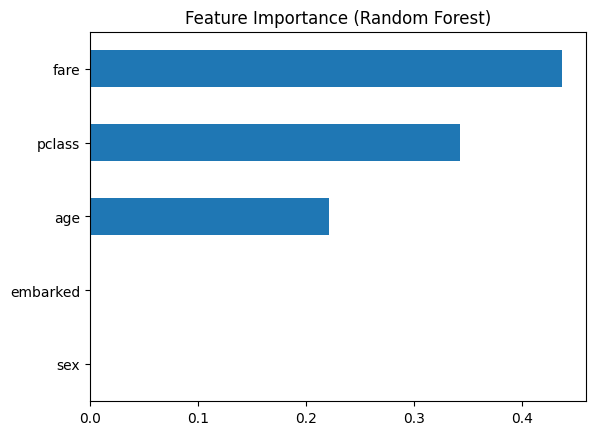

In [6]:
import matplotlib.pyplot as plt

feat_importance = pd.Series(forest.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()
